<a href="https://colab.research.google.com/github/rokzeezee/Machine-Learning-/blob/main/Confussion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns

In [92]:
df = pd.read_csv("/content/Heart.csv")
df.head(3)

,Unnamed: 0,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,1,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,2,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,3,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes


In [93]:
df.shape

(303, 15)

In [94]:
#to check only those column which have null in them
df[[i for i in df.columns if df[i].isnull().sum()>0]].isnull().sum()

Ca      4
Thal    2
dtype: int64

In [95]:
df["Ca"].value_counts()

0.0    176
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [96]:
# As the maximum number of cases have 0.0 as the Ca, replacing the missing value to 0.0
df.Ca = df.Ca.fillna(0.0)
df.Ca.value_counts()

0.0    180
1.0     65
2.0     38
3.0     20
Name: Ca, dtype: int64

In [97]:
# counting the NaN
df.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [98]:
df.Thal.value_counts()

normal        166
reversable    117
fixed          18
Name: Thal, dtype: int64

In [99]:
# As the maximum number of cases have 'Normal' as the Thal, replacing the missing value to 'Normal
df.Thal=df.Thal.fillna("normal")

In [100]:
print(df.ChestPain.unique())
print(df.Thal.unique())
print(df.AHD.unique())

['typical' 'asymptomatic' 'nonanginal' 'nontypical']
['fixed' 'normal' 'reversable']
['No' 'Yes']


In [101]:
# converting strings into 1's and Zeros 
#nominal encoding technique

heart_encoding = pd.get_dummies(df[['ChestPain', 'Thal' , "AHD"]])
heart_final = pd.concat([df, heart_encoding],1)
heart_final = heart_final.drop(['ChestPain', 'Thal' , "AHD"], axis = 1)
heart_final 


<ipython-input-101-76a405b24bfe>:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  heart_final = pd.concat([df, heart_encoding],1)


,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,...,0.0,0,0,0,1,1,0,0,1,0
1,2,67,1,160,286,0,2,108,1,1.5,...,3.0,1,0,0,0,0,1,0,0,1
2,3,67,1,120,229,0,2,129,1,2.6,...,2.0,1,0,0,0,0,0,1,0,1
3,4,37,1,130,250,0,0,187,0,3.5,...,0.0,0,1,0,0,0,1,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,...,0.0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,0,132,0,1.2,...,0.0,0,0,0,1,0,0,1,0,1
299,300,68,1,144,193,1,0,141,0,3.4,...,2.0,1,0,0,0,0,0,1,0,1
300,301,57,1,130,131,0,0,115,1,1.2,...,1.0,1,0,0,0,0,0,1,0,1
301,302,57,0,130,236,0,2,174,0,0.0,...,1.0,0,0,1,0,0,1,0,0,1


In [102]:
df2 = heart_final 

In [103]:
df2

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,1,63,1,145,233,1,2,150,0,2.3,...,0.0,0,0,0,1,1,0,0,1,0
1,2,67,1,160,286,0,2,108,1,1.5,...,3.0,1,0,0,0,0,1,0,0,1
2,3,67,1,120,229,0,2,129,1,2.6,...,2.0,1,0,0,0,0,0,1,0,1
3,4,37,1,130,250,0,0,187,0,3.5,...,0.0,0,1,0,0,0,1,0,1,0
4,5,41,0,130,204,0,2,172,0,1.4,...,0.0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,299,45,1,110,264,0,0,132,0,1.2,...,0.0,0,0,0,1,0,0,1,0,1
299,300,68,1,144,193,1,0,141,0,3.4,...,2.0,1,0,0,0,0,0,1,0,1
300,301,57,1,130,131,0,0,115,1,1.2,...,1.0,1,0,0,0,0,0,1,0,1
301,302,57,0,130,236,0,2,174,0,0.0,...,1.0,0,0,1,0,0,1,0,0,1


In [105]:
# checking no. of males(1) and female (0)
df2.Sex.value_counts()

1    206
0     97
Name: Sex, dtype: int64

In [107]:
# Checking AHD wrt sex
df2.Sex[df2.AHD_Yes ==1].value_counts()

1    114
0     25
Name: Sex, dtype: int64

In [106]:
pd.crosstab(df2.AHD_Yes,df2.Sex)

Sex,0,1
AHD_Yes,,
0,72,92
1,25,114


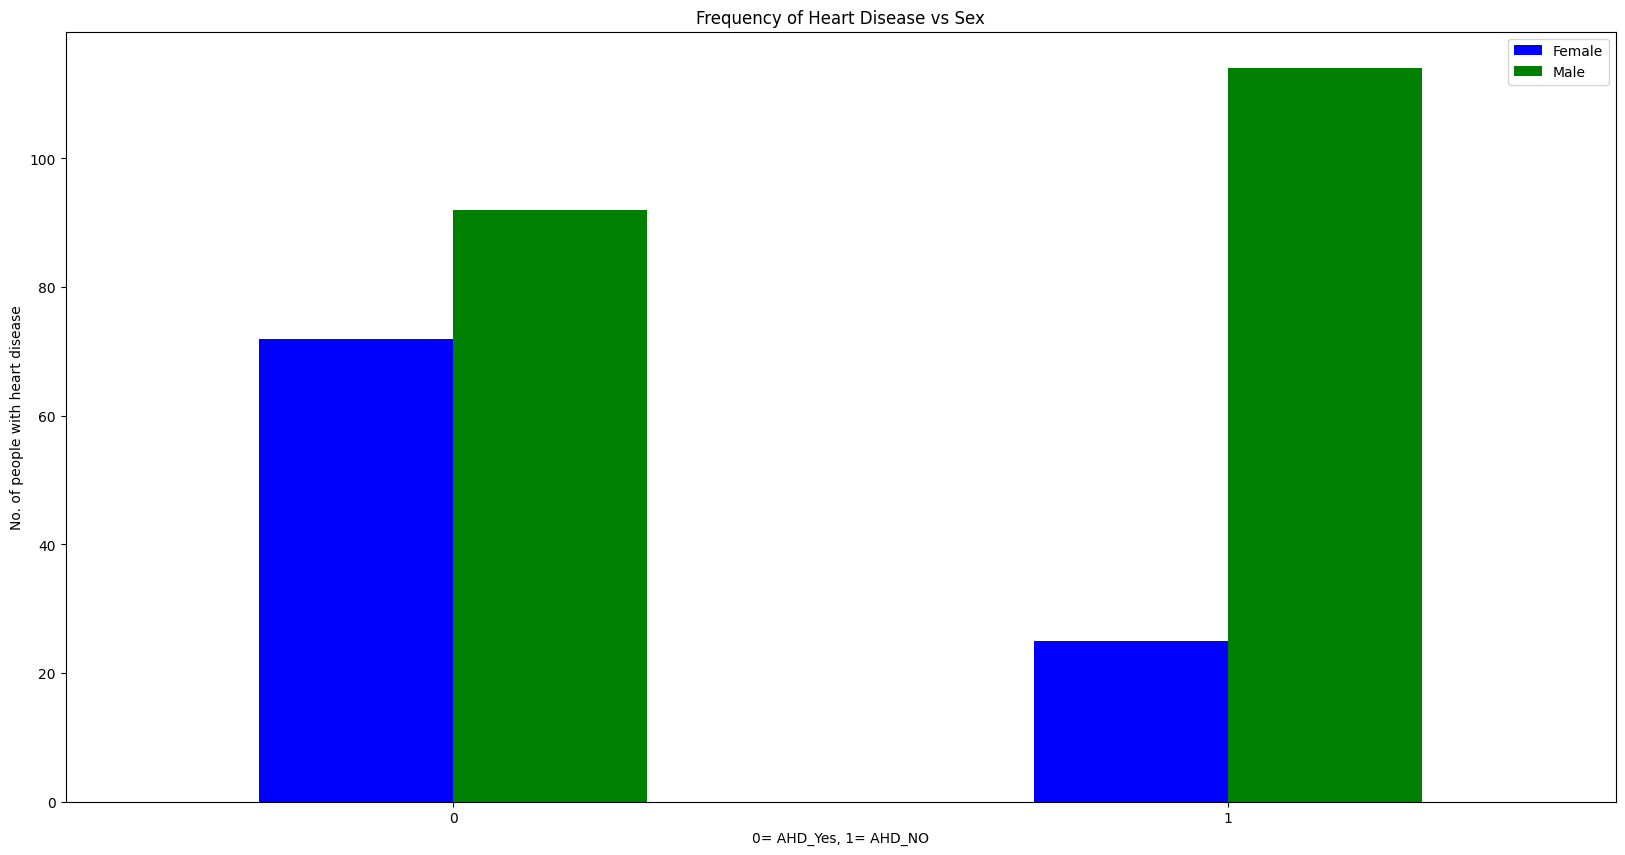

In [108]:
pd.crosstab(df2.AHD_Yes,df2.Sex).plot(kind='bar',figsize=(20,10),color=["blue","green"])
plt.title("Frequency of Heart Disease vs Sex")
plt.xlabel("0= AHD_Yes, 1= AHD_NO")
plt.ylabel("No. of people with heart disease")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

Text(0.5, 1.0, 'males vs females with heart disease')

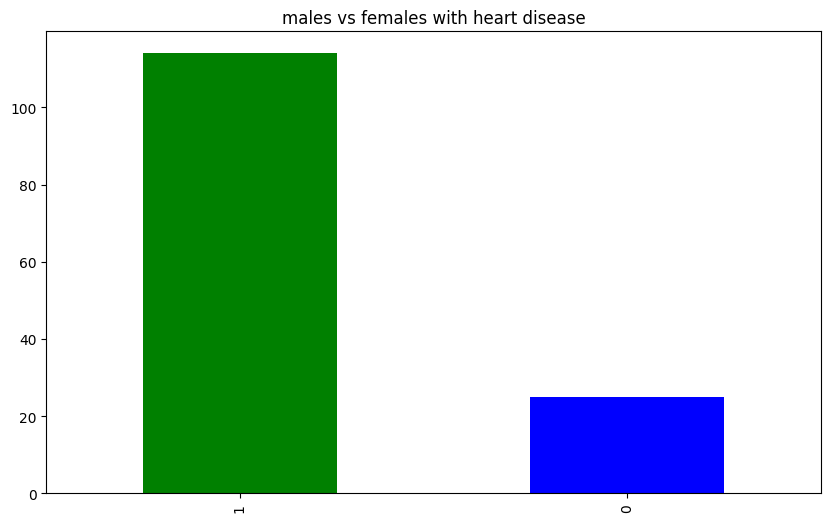

In [109]:
df2.Sex[df2.AHD_Yes==1].value_counts().plot(kind='bar',figsize=(10,6),color=['green','blue'])
plt.title("males vs females with heart disease")

In [110]:
# Finding co-relation between all column
df2.corr()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,...,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
Unnamed: 0,1.000000,-0.002367,-0.070849,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,...,0.037011,0.042387,-0.095155,0.069630,-0.015529,0.062412,0.028772,-0.059675,-0.048765,0.048765
Age,-0.002367,1.000000,-0.097542,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,...,0.365323,0.135337,-0.051714,-0.151684,0.045438,0.062042,-0.132264,0.104902,-0.223120,0.223120
Sex,-0.070849,-0.097542,1.000000,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,...,0.086048,0.086398,-0.117189,-0.037990,0.089828,0.142524,-0.387396,0.326284,-0.276816,0.276816
RestBP,-0.022028,0.284946,-0.064456,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,...,0.097528,0.027710,-0.050127,-0.083234,0.149737,0.075157,-0.139782,0.106210,-0.150825,0.150825
Chol,-0.095518,0.208950,-0.199915,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,...,0.123726,0.070343,-0.033223,-0.016453,-0.053021,-0.095743,-0.006479,0.053100,-0.085164,0.085164
Fbs,-0.039471,0.118530,0.047862,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,...,0.140764,-0.062929,0.087027,-0.060649,0.055511,0.091351,-0.073766,0.030953,-0.025264,0.025264
RestECG,-0.150232,0.148868,0.021647,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,...,0.131749,0.122589,-0.089526,-0.102979,0.065581,0.044672,-0.028989,0.007905,-0.169202,0.169202
MaxHR,-0.105488,-0.393806,-0.048663,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,...,-0.265699,-0.371989,0.159876,0.249415,0.079683,-0.159523,0.285812,-0.214326,0.417167,-0.417167
ExAng,-0.000402,0.091661,0.146201,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,...,0.145788,0.464293,-0.266871,-0.233863,-0.093384,0.063073,-0.324082,0.300223,-0.431894,0.431894
Oldpeak,-0.120384,0.203805,0.102173,0.189171,0.046564,0.005747,0.114133,-0.343085,0.288223,1.000000,...,0.301067,0.274218,-0.126339,-0.277513,0.086959,0.104635,-0.345731,0.302145,-0.424510,0.424510


<Axes: >

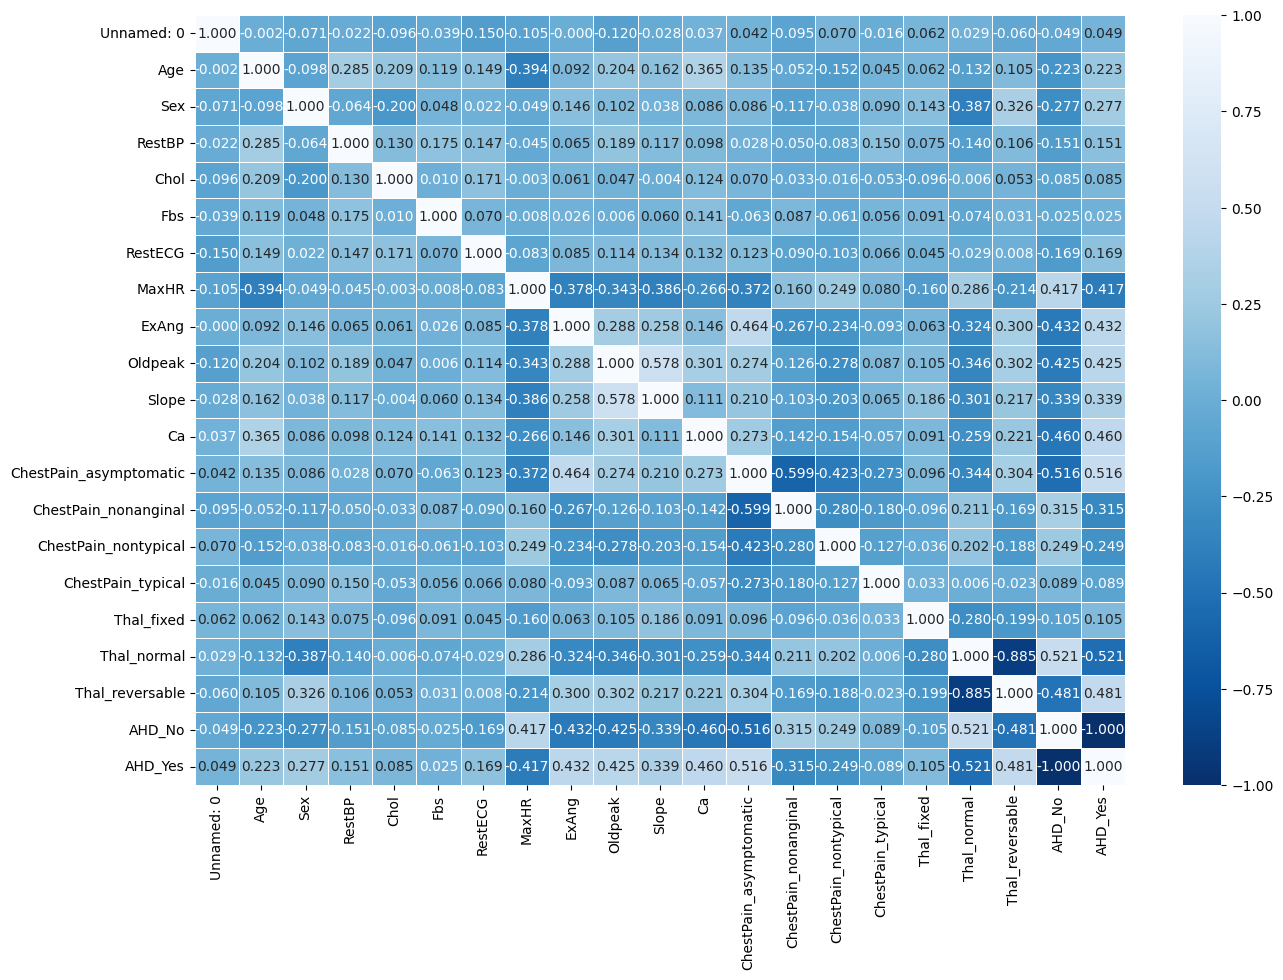

In [113]:

cor_mat=df2.corr()
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(cor_mat,annot=True,linewidths=0.5,fmt=".3f" , cmap = "Blues_r")

In [115]:
# Conclusion:- from above co-relation and heatmap we can say that AHD_NO and AHD_yes are giving the same information, so removing one of them (AHD_No)
# droping AHD_No as its giving the same value as AHD_Yes, also droping 'Unnamed: 0' as its doesnot have any benift
df2 = df2.drop(['AHD_No', 'Unnamed: 0'], axis = 1)
df2.head(2)

,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_Yes
0,63,1,145,233,1,2,150,0,2.3,3,0.0,0,0,0,1,1,0,0,0
1,67,1,160,286,0,2,108,1,1.5,2,3.0,1,0,0,0,0,1,0,1


In [116]:
# Creating Features and Target variable
X = df2.drop('AHD_Yes', axis=1)
y =df2.AHD_Yes

In [ ]:
X

In [ ]:
y

In [145]:
from sklearn.model_selection import  train_test_split
X_train , X_test ,y_train ,y_test = train_test_split(X,y , test_size = 0.2 , random_state = 42)

In [146]:
X_train.shape, X_test.shape ,y_train.shape ,y_test.shape 
#X_train .head()

((242, 18), (61, 18), (242,), (61,))

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale =scaler.fit(X_train)
#transform the scaled train and test 

X_train =scale.transform(X_train)
X_test = scale.transform(X_test)

In [148]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train , y_train)



LogisticRegression()

In [149]:
log_model=log.fit(X_train , y_train)
pred = log_model.predict(X_test)

In [150]:
score = log_model.score(X_test,y_test)
score

0.8688524590163934

In [151]:
from sklearn.metrics import accuracy_score
score2 = accuracy_score(y_test,pred)
score2

0.8688524590163934

In [154]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test , pred)

cm

array([[24,  5],
       [ 3, 29]])

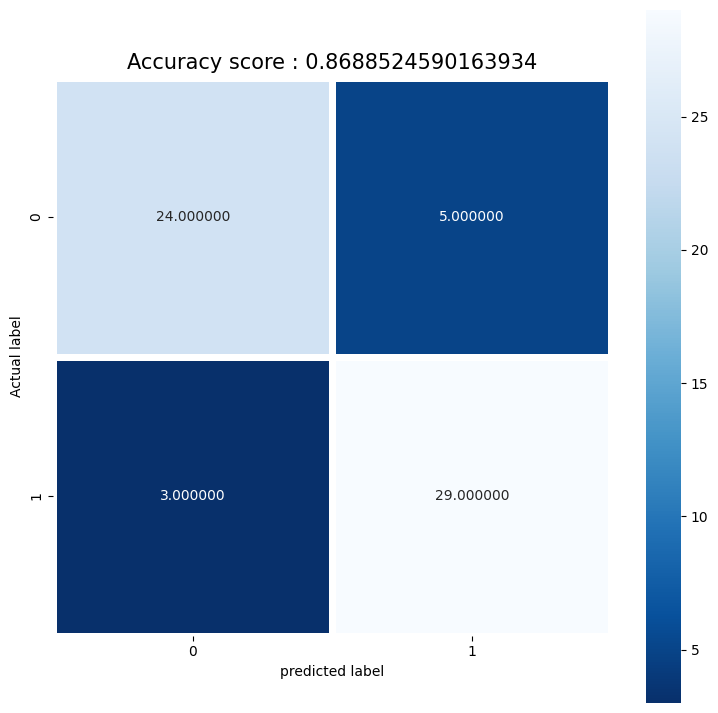

In [165]:
plt.figure(figsize=(9,9))
sns.heatmap(cm , annot=True ,fmt="3f" ,linewidths= 5, square = True ,cmap="Blues_r");
plt.ylabel("Actual label");
plt.xlabel ("predicted label");
all_sample_title = "Accuracy score : {0}".format( score2);
plt.title(all_sample_title ,size = 15);


In [156]:
#extracting TN,TP,FP,FN
TN,TP,FP,FN = confusion_matrix (y_test,pred).ravel()
TN,TP,FP,FN 

(24, 5, 3, 29)

In [161]:
 from sklearn.metrics import classification_report
 cp = classification_report(y_test,pred)
 print("classification _report" ,cp )
 

classification _report               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

